In [34]:
import random
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import dateutil

In [2]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

In [162]:
md.fit?

In [165]:
# https://www.statsmodels.org/stable/mixed_linear.html
data = sm.datasets.get_rdataset("dietox", "geepack").data
display(data)

md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])

mdf = md.fit()

print(mdf.summary())

,Pig,Evit,Cu,Litter,Start,Weight,Feed,Time
0,4601,Evit000,Cu000,1,26.5,26.50000,NaN,1
1,4601,Evit000,Cu000,1,26.5,27.59999,5.200005,2
2,4601,Evit000,Cu000,1,26.5,36.50000,17.600000,3
3,4601,Evit000,Cu000,1,26.5,40.29999,28.500000,4
4,4601,Evit000,Cu000,1,26.5,49.09998,45.200001,5
...,...,...,...,...,...,...,...,...
856,8442,Evit000,Cu175,24,25.7,73.19995,83.800003,8
857,8442,Evit000,Cu175,24,25.7,81.69995,99.800003,9
858,8442,Evit000,Cu175,24,25.7,90.29999,115.200001,10
859,8442,Evit000,Cu175,24,25.7,96.00000,133.200001,11


         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 861     Method:             REML      
No. Groups:       72      Scale:              11.3669   
Min. group size:  11      Log-Likelihood:     -2404.7753
Max. group size:  12      Converged:          Yes       
Mean group size:  12.0                                  
--------------------------------------------------------
             Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------
Intercept    15.724    0.788  19.952 0.000 14.179 17.268
Time          6.943    0.033 207.939 0.000  6.877  7.008
Group Var    40.394    2.149                            



In [25]:
df = fr_filt
df2 = np.log2(df[fr_quant_filenames_in_analytical_order].T)
fg = file_grouping[file_grouping['fr_name'].isin(fr_quant_filenames_in_analytical_order)]
fg = fg.reset_index()[['fr_name', 'rat_label', 'bg_type', 'glucose_tolerance', 'bg']].set_index('fr_name')
df = df2.join(fg)
ogtt_lookup = animal_phenotypes[['animal', 'OGTT (AUC)']]
df['ogtt'] = df['rat_label'].apply(lambda x: ogtt_lookup[ogtt_lookup['animal'] == (int(x))]['OGTT (AUC)'].values[0])
# rename columns to remove '.' because it messes with the formula notation 
new_cols = {}
for col in df.columns:
    new_cols[col] = col.replace('.', '').replace(':', '').replace('-', '')\
    .replace('[', '').replace(']', '')
df = df.rename(new_cols, axis=1)
display(df)

,unknown_67905463_0536,unknown_6411087_0537,unknown_95115973_0541,unknown_32903067_0542,unknown_96913147_0544,unknown_62313641_0546,unknown_29108359_0551,unknown_35299652_0553,unknown_24709372_0554,unknown_60514441_0555,...,unknown_89782532_20148,unknown_9749118_20163,unknown_59358716_20175,unknown_87180945_20196,unknown_100393829_20435,rat_label,bg_type,glucose_tolerance,bg,ogtt
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20.405355,21.533648,20.665848,24.400930,19.378685,23.049698,28.481360,19.316892,24.328078,19.478253,...,18.897008,16.810111,17.724121,18.400646,16.655211,1076.0,FBG,diabetic,71.000000,2321.25
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),23.313111,24.586227,23.731244,26.811664,22.709669,26.254519,30.305095,22.008084,26.237893,23.669177,...,19.348489,17.364343,19.240306,18.585339,16.313637,1062.0,FBG,impaired,52.333333,1648.75
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),23.218699,24.375151,23.038733,26.708762,21.722467,26.085255,29.595696,22.149967,25.628550,23.638288,...,21.529536,20.099612,21.430516,20.968101,19.339229,1093.0,FBG,normal,64.000000,993.00
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),24.012349,25.685664,24.916555,25.977120,23.985839,27.293718,31.938325,22.246767,27.005584,24.827176,...,17.921098,18.430542,17.488155,16.202162,17.985491,1060.0,RBG,impaired,225.000000,1761.75
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),24.302356,25.422294,24.042666,27.313654,22.321161,26.913271,30.455412,22.475813,26.363764,23.854459,...,20.133479,17.986741,19.996615,19.778245,17.357845,1091.0,FBG,normal,48.500000,846.75
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),23.901455,24.936916,24.162971,27.337061,23.184906,26.682437,30.690269,22.495336,26.325506,23.984926,...,17.824376,18.099621,17.383197,15.556400,17.582655,1092.0,RBG,impaired,70.500000,1377.95
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),23.883301,24.779941,23.627979,27.415597,22.795191,26.236176,29.854529,22.337295,25.798043,23.349277,...,18.836779,18.145468,18.282680,16.603878,17.887551,1093.0,RBG,normal,69.500000,993.00
20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),23.387975,24.696276,24.085858,27.230430,22.878785,26.307266,30.106764,22.612902,26.021376,23.659766,...,19.255315,14.496938,19.507853,19.379093,13.846921,1082.0,FBG,diabetic,50.000000,2224.75
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),24.421692,25.054941,23.169508,27.598719,22.397716,26.123572,29.717328,22.790052,25.559916,22.258087,...,18.261890,18.854601,17.718258,16.494586,18.466842,1060.0,RBG,impaired,83.000000,1761.75
20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),23.463756,24.934805,24.010849,27.126653,22.703282,26.680311,30.314104,22.526302,26.226352,24.184003,...,19.685160,18.324624,19.526233,18.844052,17.739443,1101.0,FBG,diabetic,43.000000,2015.75


In [143]:
df.drop(df.filter(regex='unknown').columns, axis=1)

,LysoPC_205_54232452_1036,LysoPC_181_52235236_1137,LysoPC_225_57035516_1417,LysoPC_171_5083407_1452,LysoPC_160_49634018_1489,LysoPC_203_54635345_1546,LysoPE_160_4522789_158,LysoPC_160_49633969_1613,LysoPC_181_5223559_1644,LysoPC_181_5223559_1786,...,TG_572_94688043_19582,TG_561_93488123_19841,TG_182_181_240_98691193_19865,TG_582_96089709_19876,TG_180_180_180_90886542_19885,rat_label,bg_type,glucose_tolerance,bg,ogtt
20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),25.761366,21.151161,21.502888,19.746842,27.905049,23.927648,19.696816,28.783727,24.037574,26.649617,...,17.790475,18.288740,17.330527,18.378388,18.447194,1076.0,FBG,diabetic,71.000000,2321.25
20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),24.722199,21.929050,22.235031,19.346304,27.894659,24.389786,19.980963,29.085373,25.952227,26.537548,...,18.200217,19.074574,17.634751,17.166214,19.507955,1062.0,FBG,impaired,52.333333,1648.75
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),26.572473,22.627844,22.157407,21.023863,28.616162,24.726495,21.665640,29.793786,26.706768,27.431200,...,21.041995,21.987667,20.504554,21.175953,21.407793,1093.0,FBG,normal,64.000000,993.00
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),26.317480,23.457071,22.821272,21.513255,28.629655,25.372207,20.959509,29.563860,26.973081,27.925980,...,18.842131,20.602708,19.499073,20.310682,20.589383,1060.0,RBG,impaired,225.000000,1761.75
20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),26.720534,22.567223,22.183918,20.807419,28.136622,24.921274,20.664497,29.378945,23.677774,27.707038,...,18.177657,19.646114,18.058011,17.710758,19.899861,1091.0,FBG,normal,48.500000,846.75
20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),26.205485,23.230362,22.057229,21.185706,27.490727,24.696600,21.030574,28.771015,26.331932,27.454832,...,18.541616,20.135387,18.825216,18.375462,19.968825,1092.0,RBG,impaired,70.500000,1377.95
20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),26.534038,23.006021,21.725095,20.987373,28.041480,24.692194,21.287890,29.124283,27.039205,27.403043,...,18.672574,20.339902,19.339697,18.989137,20.089886,1093.0,RBG,normal,69.500000,993.00
20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),25.110981,21.311045,21.424243,19.254487,27.605972,23.401488,20.059792,28.511030,24.826350,25.797660,...,16.557079,17.801631,15.799069,16.566651,18.843156,1082.0,FBG,diabetic,50.000000,2224.75
20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),27.103004,23.317397,22.855253,21.570437,28.345868,25.030869,21.563881,29.462857,27.438821,27.749590,...,18.942406,20.683726,19.624631,19.661018,20.581856,1060.0,RBG,impaired,83.000000,1761.75
20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),25.815224,21.782940,21.958579,19.408171,27.569058,24.013181,21.030366,28.799745,25.169636,26.216577,...,18.011486,20.194468,19.243350,19.419490,20.166937,1101.0,FBG,diabetic,43.000000,2015.75


In [160]:
lmem?

In [19]:
random_col = random.choice(df.drop(df.filter(regex='unknown').columns, axis=1).columns)
print(random_col)

lmem_continuous = smf.mixedlm(f"{random_col} ~ ogtt * bg_type", df, groups=df['rat_label']).fit(maxiter=100)
print(lmem_continuous.summary(), "\n\n")

lmem_categorical = smf.mixedlm(f"{random_col} ~ glucose_tolerance * bg_type", df, groups=df['rat_label']).fit(maxiter=100)
print(lmem_categorical.summary())

SM_d360_73362274_9831
               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SM_d360_73362274_9831
No. Observations: 60      Method:             REML                 
No. Groups:       10      Scale:              0.1343               
Min. group size:  6       Likelihood:         -45.1213             
Max. group size:  6       Converged:          Yes                  
Mean group size:  6.0                                              
--------------------------------------------------------------------
                     Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept            20.735     0.298  69.562  0.000  20.150  21.319
bg_type[T.RBG]       -1.413     0.344  -4.109  0.000  -2.087  -0.739
ogtt                 -0.000     0.000  -1.556  0.120  -0.001   0.000
ogtt:bg_type[T.RBG]   0.001     0.000   3.599  0.000   0.000   0.001
Group Var             0.023     0.

C:\Users\ben\Anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [77]:
lmem_continuous.__dict__['_results'].

In [74]:
vars(lmem_categorical)

{'_results': <statsmodels.regression.mixed_linear_model.MixedLMResults at 0x2070a97d808>,
 '__doc__': '\n    Class to contain results of fitting a linear mixed effects model.\n\n    MixedLMResults inherits from statsmodels.LikelihoodModelResults\n\n    Parameters\n    ----------\n    See statsmodels.LikelihoodModelResults\n\n    Attributes\n    ----------\n    model : class instance\n        Pointer to MixedLM model instance that called fit.\n    normalized_cov_params : array\n        The sampling covariance matrix of the estimates\n    params : array\n        A packed parameter vector for the profile parameterization.\n        The first `k_fe` elements are the estimated fixed effects\n        coefficients.  The remaining elements are the estimated\n        variance parameters.  The variance parameters are all divided\n        by `scale` and are not the variance parameters shown\n        in the summary.\n    fe_params : array\n        The fitted fixed-effects coefficients\n    cov_re :

In [81]:
print(lmem_continuous.aic)
print(lmem_continuous.bic)
print(lmem_continuous.bootstrap)
print(lmem_continuous.bse)
print(lmem_continuous.bse_fe)
print(lmem_continuous.bse_re)
# print(lmem_continuous.bsejac)
# print(lmem_continuous.bsejhj)
print(lmem_continuous.conf_int)
print(lmem_continuous.converged)
print(lmem_continuous.cov_params())


nan
nan
<bound method ResultMixin.bootstrap of <statsmodels.regression.mixed_linear_model.MixedLMResults object at 0x000002070ABF07C8>>
Intercept              0.298071
bg_type[T.RBG]         0.343885
ogtt                   0.000176
ogtt:bg_type[T.RBG]    0.000203
Group Var              0.180489
dtype: float64
Intercept              0.298071
bg_type[T.RBG]         0.343885
ogtt                   0.000176
ogtt:bg_type[T.RBG]    0.000203
dtype: float64
Group Var    0.066147
dtype: float64
<bound method LikelihoodModelResults.conf_int of <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper object at 0x000002070A617108>>
True
                        Intercept  bg_type[T.RBG]          ogtt  \
Intercept            8.884650e-02   -5.912850e-02 -5.044663e-05   
bg_type[T.RBG]      -5.912850e-02    1.182570e-01  3.357289e-05   
ogtt                -5.044663e-05    3.357289e-05  3.098982e-08   
ogtt:bg_type[T.RBG]  3.357289e-05   -6.714578e-05 -2.062413e-08   
Group Var           -7.0

In [ ]:
# cont = {}
# categorical = {}
# i = 0

In [26]:
import warnings
warnings.filterwarnings('ignore')

for col in df.iloc[:, 600:-5]:
    cont[col] = smf.mixedlm(f"{col} ~ ogtt * bg_type", df, groups=df['rat_label']).fit(maxiter=100)

    categorical[col] = smf.mixedlm(f"{col} ~ glucose_tolerance * bg_type", df, groups=df['rat_label']).fit(maxiter=100)
    i += 1
    if i % 100 == 0:
        print(i)

700
800
900
1000


In [30]:
v = list(cont.values())[0]
v.

In [33]:
lmem_categorical.bootstrap

<bound method ResultMixin.bootstrap of <statsmodels.regression.mixed_linear_model.MixedLMResults object at 0x000002070A97D808>>

In [40]:
pickle.dump(cont, open(r'..\data\interim\lmem_lipidomics_results_continuous.bin', 'wb'))

In [41]:
pickle.dump(categorical, open(r'..\data\interim\lmem_lipidomics_results_categorical.bin', 'wb'))

In [44]:
pickle.load(open(r'..\data\interim\lmem_lipidomics_results_categorical.bin', 'rb'))

{'unknown_67905463_0536': <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x20713366108>,
 'unknown_6411087_0537': <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x20713587808>,
 'unknown_95115973_0541': <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x207125a9288>,
 'unknown_32903067_0542': <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x207125ac9c8>,
 'unknown_96913147_0544': <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x2070d400d88>,
 'unknown_62313641_0546': <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x2070f60be48>,
 'unknown_29108359_0551': <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x2070f60bf48>,
 'unknown_35299652_0553': <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x20712675d08>,
 'unknown_24709372_0554': <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x2070a3d3f88>,
 'unknown_6

In [50]:
pd.DataFrame.from_dict?

In [ ]:
pd.DataFrame().from_dict

Index(['Intercept', 'bg_type[T.RBG]', 'ogtt', 'ogtt:bg_type[T.RBG]',
       'Group Var'],
      dtype='object')


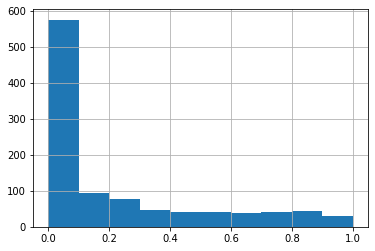

In [58]:
d = {}
for feature, model in cont.items():
#     print(model.pvalues['bg_type[T.RBG]'])
    d[feature] = model.pvalues

cont_pvals = pd.DataFrame().from_dict(d, orient='index')
print(cont_pvals.columns)
cont_pvals['ogtt:bg_type[T.RBG]'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020713A99EC8>,
      dtype=object)

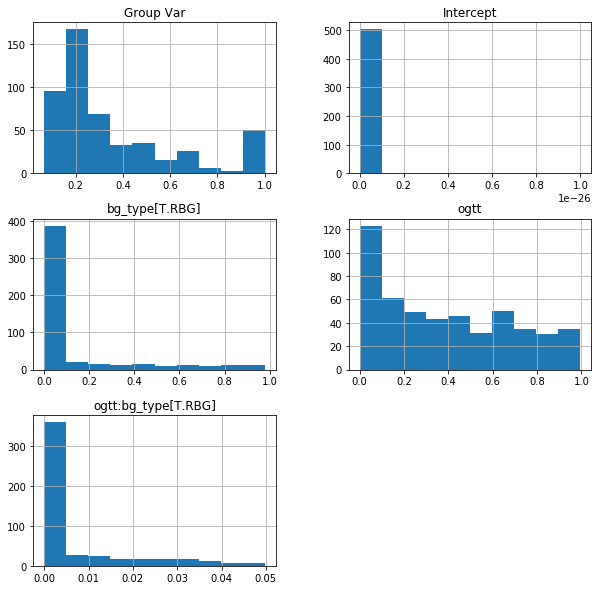

In [90]:
cont_pvals[cont_pvals['ogtt:bg_type[T.RBG]'] < 0.05].hist(figsize=(10,10))

In [82]:
cont_pvals['ogtt:bg_type[T.RBG]'].sort_values()

unknown_108179688_13387                2.093050e-14
unknown_91372266_15818                 2.733639e-11
unknown_81670746_14907                 7.955257e-11
unknown_99477686_14113                 1.739453e-10
unknown_96876172_13829                 1.761591e-10
                                           ...     
unknown_61018481_9392                  9.801676e-01
unknown_65957367_1758                  9.867361e-01
unknown_4303898_5212                   9.926188e-01
PlasmanylPC_O180_204_79662323_10082    9.973926e-01
unknown_68555347_13608                 9.997528e-01
Name: ogtt:bg_type[T.RBG], Length: 1029, dtype: float64

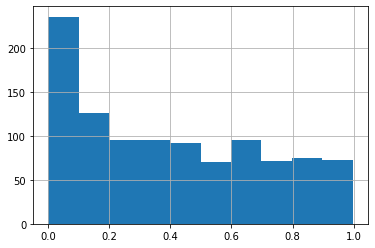

In [59]:
cont_pvals['ogtt'].hist()

In [60]:
d = {}
for feature, model in categorical.items():
#     print(model.pvalues['bg_type[T.RBG]'])
    d[feature] = model.pvalues
    ################ pd.concat or pd.append all the data outputs into one series, then make a DF from that 

cate_pvals = pd.DataFrame.from_dict(d, orient='index')
cate_pvals

,Intercept,glucose_tolerance[T.impaired],glucose_tolerance[T.normal],bg_type[T.RBG],glucose_tolerance[T.impaired]:bg_type[T.RBG],glucose_tolerance[T.normal]:bg_type[T.RBG],Group Var
unknown_67905463_0536,0.000000e+00,0.552901,0.177011,7.696863e-02,0.702413,0.627727,NaN
unknown_6411087_0537,0.000000e+00,0.592782,0.694984,7.151380e-01,0.637370,0.908535,1.000000
unknown_95115973_0541,0.000000e+00,0.933355,0.941052,2.954694e-01,0.831653,0.623403,NaN
unknown_32903067_0542,0.000000e+00,0.414223,0.411584,8.589627e-02,0.433948,0.568256,1.000000
unknown_96913147_0544,0.000000e+00,0.090210,0.589971,1.887219e-02,0.136542,0.368798,1.000000
...,...,...,...,...,...,...,...
unknown_89782532_20148,0.000000e+00,0.405183,0.047375,4.895340e-01,0.000134,0.000024,0.258736
unknown_9749118_20163,3.783054e-310,0.114931,0.174453,3.733471e-07,0.000521,0.000457,0.277407
unknown_59358716_20175,0.000000e+00,0.309421,0.056746,3.104837e-01,0.000064,0.000023,0.371336
unknown_87180945_20196,0.000000e+00,0.850441,0.104404,4.516217e-06,0.000187,0.000094,0.275860


### To compare whether the effect is significant, use log likelihood (more safe) or Tukey's test

In [61]:
lmem_categorical.

NameError: name 'lmem' is not defined

In [124]:
random_col

'unknown_9208653_19525'

In [140]:
no_warning_features = ['unknown_9208653_19525', 'TG_524_8727702_16817', 'TG_566_92480176_16736']